<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


 ## Lab 2: Data wrangling 


Estimated time needed: **60** minutes


In this lab, we will perform some Exploratory Data Analysis (EDA) to find some patterns in the data and determine what would be the label for training supervised models. 

In the data set, there are several different cases where the booster did not land successfully. Sometimes a landing was attempted but failed due to an accident; for example, <code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully landed on  a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed on a drone ship. 

In this lab we will mainly convert those outcomes into Training Labels with `1` means the booster successfully landed `0` means it was unsuccessful.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


## Objectives
Perform exploratory  Data Analysis and determine Training Labels 

- Exploratory Data Analysis
- Determine Training Labels 


----


Install the below libraries


In [1]:
!pip install pandas
!pip install numpy

## Import Libraries and Define Auxiliary Functions


We will import the following libraries.


In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

### Data Analysis 


Load Space X dataset, from last section.


In [4]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857
6,7,2014-04-18,Falcon 9,2296.000000,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857
7,8,2014-07-14,Falcon 9,1316.000000,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857
8,9,2014-08-05,Falcon 9,4535.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1008,-80.577366,28.561857
9,10,2014-09-07,Falcon 9,4428.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1011,-80.577366,28.561857


Identify and calculate the percentage of the missing values in each attribute


In [4]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

Identify which columns are numerical and categorical:


In [5]:
print(df)

    FlightNumber        Date BoosterVersion   PayloadMass Orbit    LaunchSite  \
0              1  2010-06-04       Falcon 9   6104.959412   LEO  CCAFS SLC 40   
1              2  2012-05-22       Falcon 9    525.000000   LEO  CCAFS SLC 40   
2              3  2013-03-01       Falcon 9    677.000000   ISS  CCAFS SLC 40   
3              4  2013-09-29       Falcon 9    500.000000    PO   VAFB SLC 4E   
4              5  2013-12-03       Falcon 9   3170.000000   GTO  CCAFS SLC 40   
..           ...         ...            ...           ...   ...           ...   
85            86  2020-09-03       Falcon 9  15400.000000  VLEO    KSC LC 39A   
86            87  2020-10-06       Falcon 9  15400.000000  VLEO    KSC LC 39A   
87            88  2020-10-18       Falcon 9  15400.000000  VLEO    KSC LC 39A   
88            89  2020-10-24       Falcon 9  15400.000000  VLEO  CCAFS SLC 40   
89            90  2020-11-05       Falcon 9   3681.000000   MEO  CCAFS SLC 40   

        Outcome  Flights  G

### TASK 2: Calculate the number and occurrence of each orbit


In [6]:
# Calculate the number and occurrence of each orbit
orbit_occurrences = df['Orbit'].value_counts()

# Display the result
print(orbit_occurrences)

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: count, dtype: int64


In [7]:
orbit_df = orbit_occurrences.reset_index()
orbit_df.columns = ['Orbit', 'Count']
print(orbit_df)

    Orbit  Count
0     GTO     27
1     ISS     21
2    VLEO     14
3      PO      9
4     LEO      7
5     SSO      5
6     MEO      3
7   ES-L1      1
8     HEO      1
9      SO      1
10    GEO      1


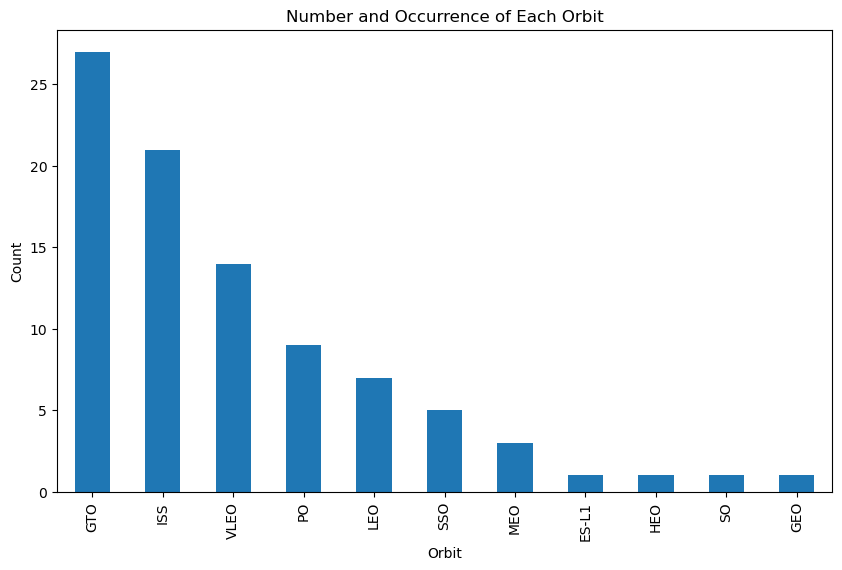

In [ ]:


orbit_occurrences.plot(kind='bar', figsize=(10, 6))
plt.title('Number and Occurrence of Each Orbit')
plt.xlabel('Orbit')
plt.ylabel('Count')
plt.show()

### TASK 3: Calculate the number and occurence of mission outcome of the orbits


Use the method <code>.value_counts()</code> on the column <code>Outcome</code> to determine the number of <code>landing_outcomes</code>.Then assign it to a variable landing_outcomes.


    Orbit      Outcome  Count
0   ES-L1   True Ocean      1
1     GEO    True ASDS      1
2     GTO   False ASDS      1
3     GTO    None ASDS      1
4     GTO    None None     11
5     GTO    True ASDS     13
6     GTO   True Ocean      1
7     HEO    True ASDS      1
8     ISS   False ASDS      2
9     ISS  False Ocean      1
10    ISS   False RTLS      1
11    ISS    None ASDS      1
12    ISS    None None      3
13    ISS    True ASDS      5
14    ISS   True Ocean      1
15    ISS    True RTLS      7
16    LEO    None None      2
17    LEO   True Ocean      1
18    LEO    True RTLS      4
19    MEO    None None      1
20    MEO    True ASDS      2
21     PO   False ASDS      1
22     PO  False Ocean      1
23     PO    None None      1
24     PO    True ASDS      5
25     PO   True Ocean      1
26     SO    None None      1
27    SSO    True ASDS      2
28    SSO    True RTLS      3
29   VLEO   False ASDS      2
30   VLEO    True ASDS     12
Outcome  False ASDS  False Ocean  False 

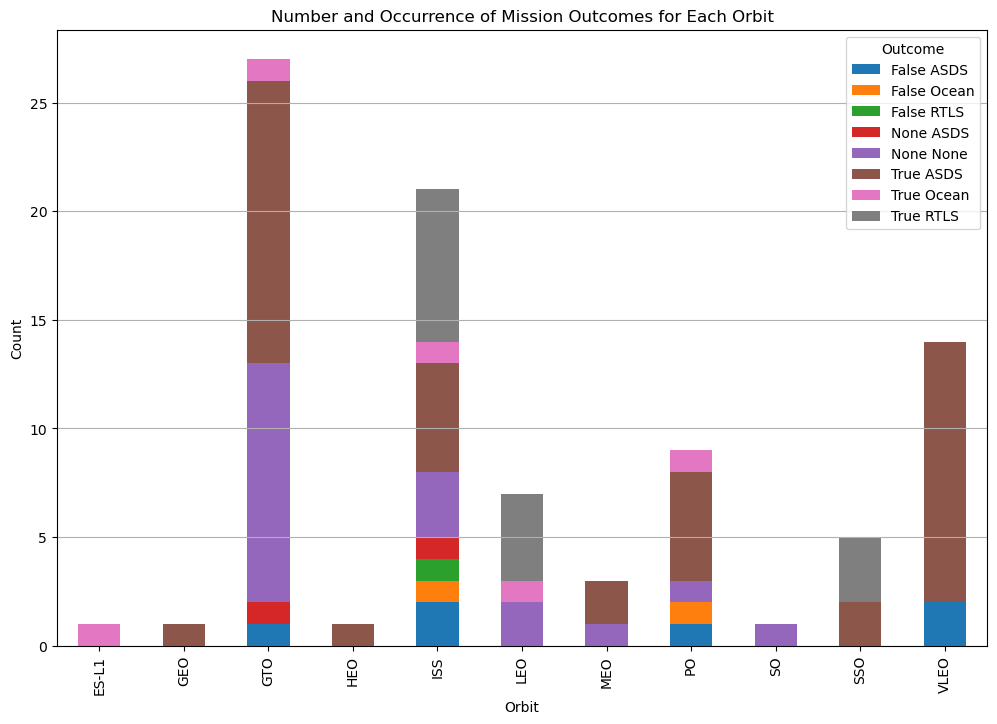

In [9]:

mission_outcome_counts = df.groupby(['Orbit', 'Outcome']).size().reset_index(name='Count')
print(mission_outcome_counts)

pivot_data = mission_outcome_counts.pivot(index='Orbit', columns='Outcome', values='Count').fillna(0)
print(pivot_data)

# Visualize the data
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Number and Occurrence of Mission Outcomes for Each Orbit')
plt.xlabel('Orbit')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.grid(axis='y')
plt.show()

Using the <code>Outcome</code>,  create a list where the element is zero if the corresponding  row  in  <code>Outcome</code> is in the set <code>bad_outcome</code>; otherwise, it's one. Then assign it to the variable <code>landing_class</code>:


We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.
